In [ ]:
import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
!pip install dmba
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [ ]:
from dmba import backward_elimination, forward_selection, stepwise_selection

## Section 1 – Data Preparation and Exploration




Question 1: Create a new data frame.  Remove the first four variables from the Airfares data and convert the appropriate variables into Dummy variables.  Show dataset information for shape, columns, and head.


In [ ]:
airlines_df = pd.read_csv('Airfares_Test1.csv')
airlines_df.shape


(638, 18)

In [ ]:
airlines_df.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [ ]:
airlines_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,1,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,1,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,1,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,1,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,1,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


In [ ]:
airlines_df = airlines_df.drop(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY'], axis = 1)
airlines_df.shape

(638, 14)

In [ ]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COUPON    638 non-null    float64
 1   NEW       638 non-null    int64  
 2   VACATION  638 non-null    int64  
 3   SW        638 non-null    object 
 4   HI        638 non-null    float64
 5   S_INCOME  638 non-null    int64  
 6   E_INCOME  638 non-null    int64  
 7   S_POP     638 non-null    int64  
 8   E_POP     638 non-null    int64  
 9   SLOT      638 non-null    object 
 10  GATE      638 non-null    object 
 11  DISTANCE  638 non-null    int64  
 12  PAX       638 non-null    int64  
 13  FARE      638 non-null    float64
dtypes: float64(3), int64(8), object(3)
memory usage: 69.9+ KB


In [ ]:
airlines_df.VACATION = airlines_df.VACATION.astype('category')

In [ ]:
airlines_df = pd.get_dummies(airlines_df, drop_first = True)
airlines_df.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_5,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637,21112,3036732,205711,312,7864,64.11,0,1,1,1
1,1.06,3,5419.16,26993,29838,3532657,7145897,576,8820,174.47,0,0,1,1
2,1.06,3,9185.28,30124,29838,5787293,7145897,364,6452,207.76,0,0,1,1
3,1.06,3,2657.35,29260,29838,7830332,7145897,612,25144,85.47,0,1,0,1
4,1.06,3,2657.35,29260,29838,7830332,7145897,612,25144,85.47,0,1,1,1


In [ ]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COUPON      638 non-null    float64
 1   NEW         638 non-null    int64  
 2   HI          638 non-null    float64
 3   S_INCOME    638 non-null    int64  
 4   E_INCOME    638 non-null    int64  
 5   S_POP       638 non-null    int64  
 6   E_POP       638 non-null    int64  
 7   DISTANCE    638 non-null    int64  
 8   PAX         638 non-null    int64  
 9   FARE        638 non-null    float64
 10  VACATION_5  638 non-null    uint8  
 11  SW_Yes      638 non-null    uint8  
 12  SLOT_Free   638 non-null    uint8  
 13  GATE_Free   638 non-null    uint8  
dtypes: float64(3), int64(7), uint8(4)
memory usage: 52.5 KB


Question 2: Explore the relationships between all numeric variables including the outcome (FARE) by creating a 1) correlation table, 2) heat map and 3) scatterplot matrix.

In [ ]:
corr = airlines_df.iloc[:,:10].corr()
corr

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
COUPON,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537
NEW,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495,0.091730
HI,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961,0.025195
S_INCOME,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135
E_INCOME,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092
S_POP,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097
E_POP,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043
DISTANCE,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016
PAX,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705
FARE,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000


<Axes: >

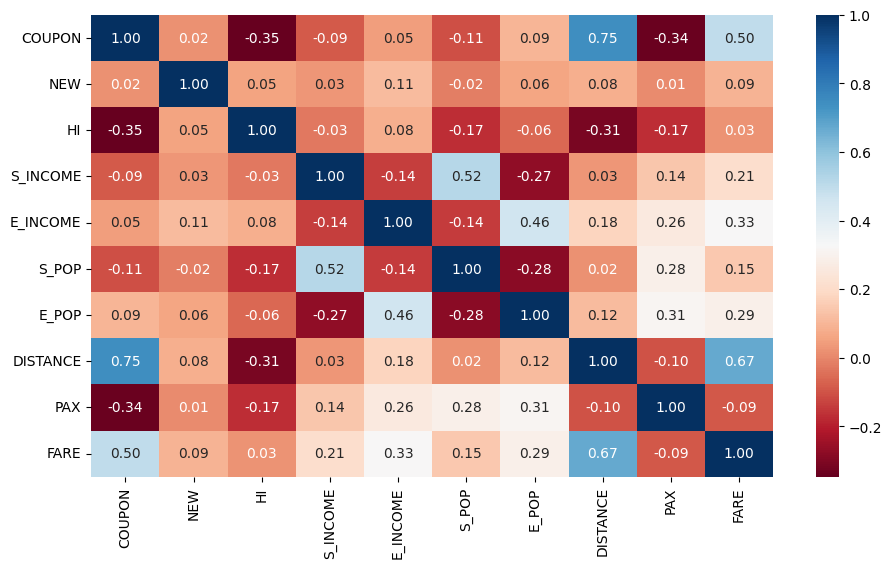

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11,6)
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f')

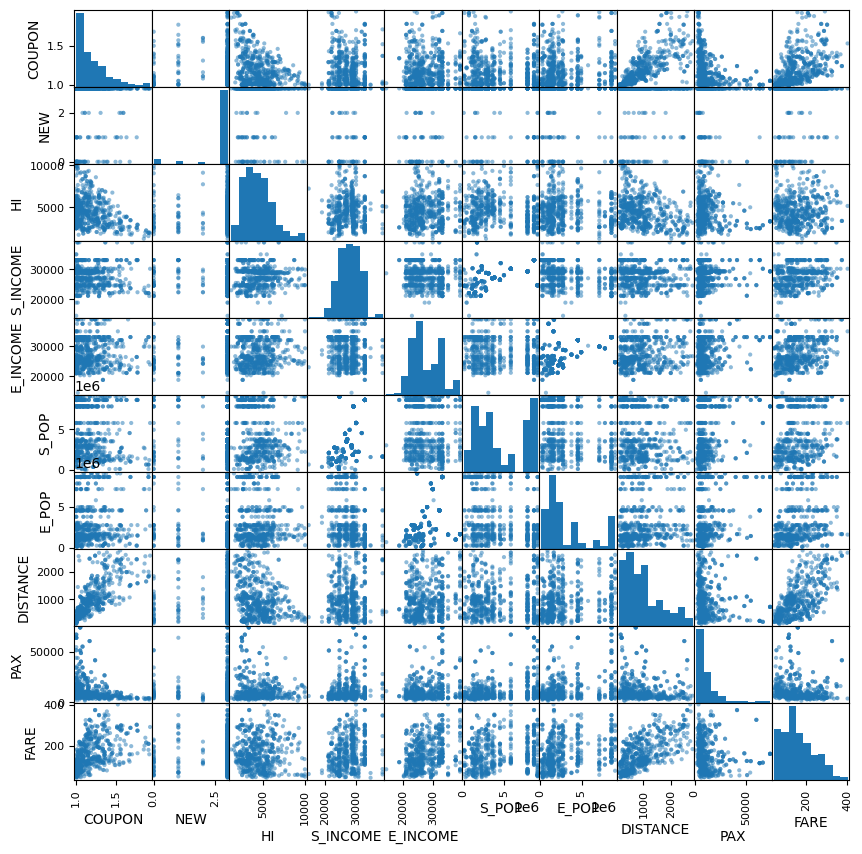

In [ ]:
s = scatter_matrix(airlines_df.iloc[:,:10],
                   figsize=[10,10])

Question 3: What seems to be the best single predictor of FARE and why?

Answer: The best single predictor of FARE seems to be DISTANCE, because it has the higher correlation with FARE. It has a positive correlation of 0.67:

Question 4: Which variable(s) are at least 70% correlated?  Of those pairs, which variable would you remove from your model and why?

Answer: Just COUPON and DISTANCE has a correlation hiher than 70%, they have a positive correlation of 0.75. I would remove COUPON because it has a lower correlation with our target FARE, they have a correlation of 0.50; while DISTANCE and FARE have a correlation of 0.67.

## Section 2 – Variable Reduction Techniques  

Question 5: Conduct a PCA analysis.

In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(airlines_df.iloc[:,:10].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'std_dev': np.sqrt(pcs.explained_variance_),
                              'propofvar': pcs.explained_variance_ratio_,
                              'cum_propvar': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1,len(pcsSummary_df.columns) + 1)]
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
std_dev,1.600179,1.376215,1.295480,1.097597,0.969514,0.724001,0.677054,0.619505,0.482976,0.372269
propofvar,0.255656,0.189100,0.167564,0.120283,0.093848,0.052336,0.045768,0.038319,0.023290,0.013837
cum_propvar,0.255656,0.444756,0.612319,0.732602,0.826451,0.878786,0.924555,0.962873,0.986163,1.000000


Question 6: At how many PC’s do you attain a cumulative proportion of over 70%? At how many PC’s do you attain a cumulative proportion of over 90%?

Answer: I can get down from 10 PC's to 4 PC's to attain a cumulative proportion of over 70%. If I want to attain the 90%, I can get down from 10 PC's to 7 PC's.

## Section 2 – Linear Regressions

Question 7: Perform a full regression predicting the FARE using the data frame from SECTION 1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [ ]:
outcome = 'FARE'
predictors = [s for s in airlines_df if s not in outcome]

X = airlines_df[predictors]
y = airlines_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=301314502)

airlines_lm = LinearRegression()
airlines_lm.fit(train_X, train_y)

LinearRegression()

In [ ]:
regressionSummary(valid_y, airlines_lm.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 1.6189
       Root Mean Squared Error (RMSE) : 34.7965
            Mean Absolute Error (MAE) : 26.9263
          Mean Percentage Error (MPE) : -3.8702
Mean Absolute Percentage Error (MAPE) : 19.3055


Question 8: Perform a forward regression predicting the FARE using the data frame from SECTION 1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_forw_model, best_forw_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_forw_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_5, SW_Yes, SLOT_Free, GATE_Free
Start: score=4388.12, constant
Step: score=4154.79, add DISTANCE
Step: score=4020.22, add SW_Yes
Step: score=3930.15, add VACATION_5
Step: score=3906.95, add HI
Step: score=3890.71, add SLOT_Free
Step: score=3864.86, add GATE_Free
Step: score=3862.75, add S_POP
Step: score=3853.54, add E_POP
Step: score=3839.85, add PAX
Step: score=3837.57, add E_INCOME
Step: score=3837.57, add None
['DISTANCE', 'SW_Yes', 'VACATION_5', 'HI', 'SLOT_Free', 'GATE_Free', 'S_POP', 'E_POP', 'PAX', 'E_INCOME']


In [ ]:
regressionSummary(valid_y, best_forw_model.predict(valid_X[best_forw_variables]))


Regression statistics

                      Mean Error (ME) : 1.4282
       Root Mean Squared Error (RMSE) : 35.0633
            Mean Absolute Error (MAE) : 27.1794
          Mean Percentage Error (MPE) : -4.0626
Mean Absolute Percentage Error (MAPE) : 19.6045


Question 9: Perform a backward regression predicting the FARE using the data frame from SECTION 1.  Your train validation split should be 60/40.  Your random seed should be your student ID number.  Fit your model to the validation data and generate error statistics.

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_back_model, best_back_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_back_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_5, SW_Yes, SLOT_Free, GATE_Free
Start: score=3842.82
Step: score=3840.83, remove COUPON
Step: score=3839.10, remove NEW
Step: score=3837.57, remove S_INCOME
Step: score=3837.57, remove None
['HI', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_5', 'SW_Yes', 'SLOT_Free', 'GATE_Free']


In [ ]:
regressionSummary(valid_y, best_back_model.predict(valid_X[best_back_variables]))


Regression statistics

                      Mean Error (ME) : 1.4282
       Root Mean Squared Error (RMSE) : 35.0633
            Mean Absolute Error (MAE) : 27.1794
          Mean Percentage Error (MPE) : -4.0626
Mean Absolute Percentage Error (MAPE) : 19.6045


Question 10: Which model is the best model and why?

Answer: The best model if we compare the Mean Absolut Error (MAE) is the full regression with the lowe MAE of 26.92.

Question 11: Discuss the insights revealed from your best model?  (Hint: This may require more coding steps.)

In [ ]:
print('intercept ', airlines_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': airlines_lm.coef_}))

intercept  35.140984028942
     Predictor  coefficient
0       COUPON    -1.677365
1          NEW    -1.237306
2           HI     0.008435
3     S_INCOME     0.000477
4     E_INCOME     0.001171
5        S_POP     0.000004
6        E_POP     0.000004
7     DISTANCE     0.076881
8          PAX    -0.000782
9   VACATION_5   -31.899759
10      SW_Yes   -40.898977
11   SLOT_Free   -16.086987
12   GATE_Free   -21.361840


In [ ]:
valid_pred = airlines_lm.predict(valid_X)

In [ ]:
valid_results = pd.DataFrame({'TOTAL_VALUE' : valid_y,
                              'predicted'   : valid_pred,
                              'residual'    : valid_pred - valid_y})
valid_results.head()

,TOTAL_VALUE,predicted,residual
283,278.39,248.752546,-29.637454
82,74.28,101.943776,27.663776
367,169.90,183.899293,13.999293
347,133.04,125.534375,-7.505625
300,92.78,74.979197,-17.800803


Answer: From my best model (full regression) the equation the predict the average rate on a rute is the following:

**FARE** = 35.140984028942 -1.677365(COUPON) -1.237306(NEW)+ 0.008435(HI) + 0.000477(S_INCOME) + 0.001171(E_INCOME) + 0.000004(S_POP) + 0.000004(E_POP) + 0.076881(DISTANCE) -0.000782(PAX) -31.899759(VACATION_5) -40.898977(SW_Yes) -16.086987(SLOT_Free) -21.361840(GATE_Free)

Where we can see that the variables that have a strong weight to calculate the average fare of a route are:
*   **VACATION:** if the route is a vacation route (VACATION_5 = 0), the average fare tends to increse; while the average fare tends to decrease for the routes that are not a vacation route (VACATION_5 = 1)
*   **SW**: where Soutwest Airlines serves the route (SW_Yes = 1), the average fare tends to decrese.
*   **SLOT**: for a endpoint where the airport is slot-controlled (SLOT_Free = 0), the average fare of airlines tickets tends to increase. While for the endpoint where the airport is not slot-copntrolled (SLOT_Free=1), the average fare tends to decrease 16 units.
*   **GATE**:




  